In [2]:
using Plots
using LinearAlgebra
using DifferentialEquations
using Random

In [3]:
include("euler_method.jl")
include("DTM.jl")
include("lorentz_system.jl")
include("RK4.jl")

RK4 (generic function with 2 methods)

In [4]:
## parameter values
θ = 10.0; β = 8/3; μ = 28
time = 20
Δt = 0.001

# initial values
x₀ = -15; y₀ = -17; z₀ = 35
x̄₀ = [x₀;
      y₀;
      z₀]

3-element Vector{Int64}:
 -15
 -17
  35

In [5]:
# Finds path for starting position x̄₀
function Energy_of_Path(ẋ::Function, Δt, tim, x̄₀, p)
    tsteps = Int(tim/Δt)
    x̄=x̄₀
    Energy = zeros(tsteps)
    for i=1:tsteps
        x̄= ẋ(p,x̄,Δt)
        Energy[i] = EnergyFunction(x̄,p)
    end
    return Energy
end

Energy_of_Path (generic function with 1 method)

In [6]:
function EnergyFunction(x, p)
    ẋ=LorentzSystem(x,p)
    return 0.5 * (ẋ[1]^2 + ẋ[2]^2 + ẋ[3]^2)
end

EnergyFunction (generic function with 1 method)

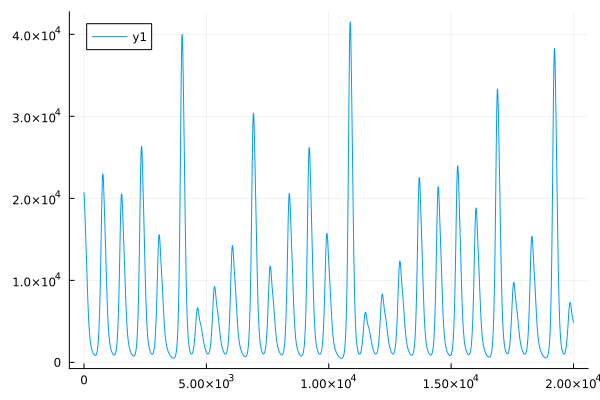

In [7]:
Energy = Energy_of_Path(RK4, Δt, time, x̄₀, [θ,μ,β])
plot(Energy)